<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_8_Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DATA PREPROCESSING
# Uploading the Dataset
from google.colab import files
uploaded = files.upload()

Saving winequality.zip to winequality.zip


In [2]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
import zipfile
import os

# Unzip from /content/
with zipfile.ZipFile("winequality.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Check extracted files
os.listdir()

['.config',
 'winequality-white.csv',
 'winequality.zip',
 'winequality-red.csv',
 'winequality.names',
 'sample_data']

In [7]:
# Loading Dataset
red_df = pd.read_csv("winequality-red.csv", sep=';')
white_df = pd.read_csv("winequality-white.csv", sep=';')

print("Red wine shape:", red_df.shape)
print("White wine shape:", white_df.shape)


Red wine shape: (1599, 12)
White wine shape: (4898, 12)


In [8]:
# Add Wine Type Column
red_df["is_red"] = 1
white_df["is_red"] = 0

red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
# Concatenate Datasets
# Combining the datasets
wine_df = pd.concat([red_df, white_df], axis=0)

# Resetting index
wine_df = wine_df.reset_index(drop=True)

# Removing the duplicates
wine_df = wine_df.drop_duplicates()

print("Combined dataset shape:", wine_df.shape)
wine_df.head()

Combined dataset shape: (5320, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
# Handling Imbalanced Data
# Removing extreme quality values
wine_df = wine_df[(wine_df["quality"] > 4) & (wine_df["quality"] < 8)]

print("Dataset shape after removing extremes:", wine_df.shape)

# Checking the distribution
wine_df["quality"].value_counts()

Dataset shape after removing extremes: (4931, 13)


,count
quality,
6,2323
5,1752
7,856


In [12]:
# Train / Test Split (80/20)
# Separate features and labels first
X = wine_df.drop(["quality", "is_red"], axis=1)
y_quality = wine_df["quality"]
y_type = wine_df["is_red"]

# First split: Train (80%) and Test (20%)
X_train, X_test, yq_train, yq_test, yt_train, yt_test = train_test_split(
    X, y_quality, y_type,
    test_size=0.2,
    random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (3944, 11)
Testing shape: (987, 11)


In [13]:
# Creating Validation Set -from training
# Creating the validation set (20% of training)
X_train, X_val, yq_train, yq_val, yt_train, yt_val = train_test_split(
    X_train, yq_train, yt_train,
    test_size=0.2,
    random_state=42
)

print("Final Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Final Training shape: (3155, 11)
Validation shape: (789, 11)
Test shape: (987, 11)


In [14]:
# FEATURING NORMALIZATION
# Normalize Using Training Statistics
# Computing mean and std from training data
mean = X_train.mean()
std = X_train.std()

# Normalize
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2527,-0.546653,-0.547015,0.203402,1.518717,-0.056630,0.965895,1.132543,1.147944,2.297259,-0.445258,-0.448317
5579,-0.857031,-0.731048,-0.478423,1.540770,-0.586883,1.371964,0.353544,0.079607,-0.066018,-0.932525,0.149217
473,2.091558,0.066429,1.567053,-0.664559,0.128958,-1.470516,-1.788706,0.846532,0.253343,1.782247,0.063855
537,0.694858,2.980286,-0.546606,-0.664559,0.712236,-1.470516,-1.806410,0.880022,0.955939,1.643028,0.149217
231,0.617263,0.250462,-1.773891,-0.730719,0.553160,-1.064447,-1.169047,0.561866,0.955939,-0.097211,-0.533679


In [15]:
# MODEL ARCHITECTURE -Functional API
# Building the Multi-Output Model
# Input layer
inputs = keras.Input(shape=(X_train.shape[1],))

# Base layers
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)

# Output 1: Regression (Wine Quality)
wine_quality = layers.Dense(1, name="wine_quality")(x)

# Output 2: Classification (Wine Type)
wine_type = layers.Dense(1, activation='sigmoid', name="wine_type")(x)

# Defining model
model = keras.Model(inputs=inputs,
                    outputs=[wine_quality, wine_type])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      1,536 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wine_quality        │ (None, 1)         │        129 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wine_type (Dense)   │ (None, 1)         │        129 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,306 (71.51 KB)

 Trainable params: 18,306 (71.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# MODEL COMPILATION
# Compiling Model
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss={
        "wine_quality": "mse",
        "wine_type": "binary_crossentropy"
    },
    metrics={
        "wine_quality": keras.metrics.RootMeanSquaredError(),
        "wine_type": "accuracy"
    }
)

In [17]:
# MODELING TRAINING
# Training Model (40 Epochs)
history = model.fit(
    X_train,
    {"wine_quality": yq_train, "wine_type": yt_train},
    epochs=40,
    validation_data=(
        X_val,
        {"wine_quality": yq_val, "wine_type": yt_val}
    ),
    verbose=1
)

Epoch 1/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 8.8414 - wine_quality_loss: 8.3685 - wine_quality_root_mean_squared_error: 2.7478 - wine_type_accuracy: 0.7867 - wine_type_loss: 0.4726 - val_loss: 1.3380 - val_wine_quality_loss: 1.2277 - val_wine_quality_root_mean_squared_error: 1.1075 - val_wine_type_accuracy: 0.9873 - val_wine_type_loss: 0.1111
Epoch 2/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1994 - wine_quality_loss: 1.1169 - wine_quality_root_mean_squared_error: 1.0554 - wine_type_accuracy: 0.9915 - wine_type_loss: 0.0825 - val_loss: 0.7985 - val_wine_quality_loss: 0.7515 - val_wine_quality_root_mean_squared_error: 0.8658 - val_wine_type_accuracy: 0.9949 - val_wine_type_loss: 0.0484
Epoch 3/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7175 - wine_quality_loss: 0.6731 - wine_quality_root_mean_squared_error: 0.8195 - wine_type_accuracy: 0.9942 - wine_type_loss: 0.0444 - val_loss: 0.5912 - val_wine_quality_loss: 0.5541 - val_wine_quality_root_mean_squared_er

In [18]:
# Evaluating on Test Set
results = model.evaluate(
    X_test,
    {"wine_quality": yq_test, "wine_type": yt_test}
)

print("\nTest Results:")
print("Total Loss:", results[0])
print("Wine Quality Loss (MSE):", results[1])
print("Wine Type Loss:", results[2])
print("Wine Quality RMSE:", results[3])
print("Wine Type Accuracy:", results[4])

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4847 - wine_quality_loss: 0.4639 - wine_quality_root_mean_squared_error: 0.6808 - wine_type_accuracy: 0.9966 - wine_type_loss: 0.0209

Test Results:
Total Loss: 0.4742966592311859
Wine Quality Loss (MSE): 0.4584389925003052
Wine Type Loss: 0.01657668687403202
Wine Quality RMSE: 0.6765090227127075
Wine Type Accuracy: 0.9979736804962158


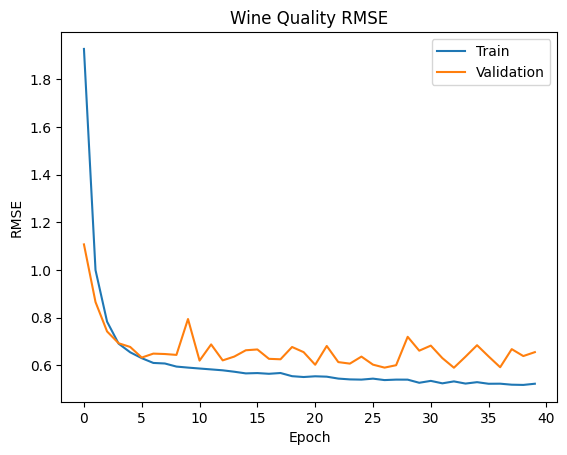

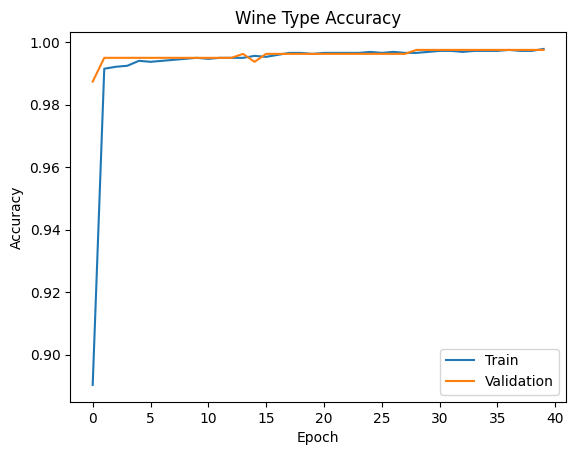

In [19]:
# VISUALIZATIONS
# Plotting Training & Validation Metrics
# Plot RMSE
plt.figure()
plt.plot(history.history['wine_quality_root_mean_squared_error'])
plt.plot(history.history['val_wine_quality_root_mean_squared_error'])
plt.title("Wine Quality RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(["Train", "Validation"])
plt.show()

# Plotting Accuracy
plt.figure()
plt.plot(history.history['wine_type_accuracy'])
plt.plot(history.history['val_wine_type_accuracy'])
plt.title("Wine Type Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


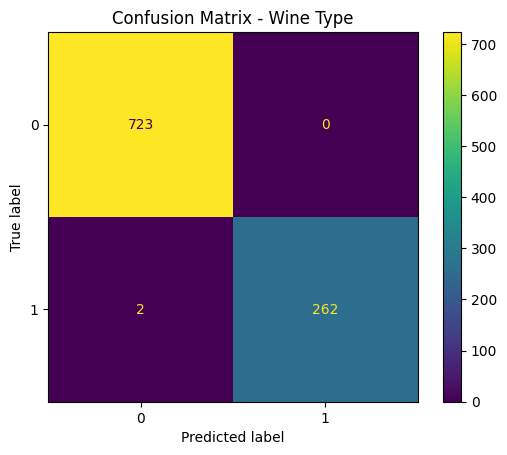

In [20]:
# Confusion Matrix
# Predict wine type
pred_quality, pred_type = model.predict(X_test)

# Converting the probabilities to binary
pred_type_binary = (pred_type > 0.5).astype(int)

cm = confusion_matrix(yt_test, pred_type_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Wine Type")
plt.show()

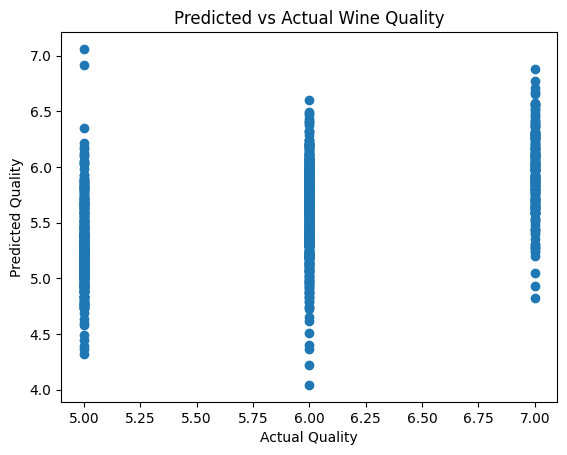

In [21]:
# Scattering the Plot -Predicted vs Actual Quality
plt.figure()
plt.scatter(yq_test, pred_quality)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Wine Quality")
plt.show()